In [ ]:
import pyWitness
from matplotlib.pyplot import *

# Tutorial

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.checkData()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.columnValues("responseTime")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.xlsx","test1")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.printPivot()
dp.printRates()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.printDescriptiveStats()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.plotROC()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.plotCAC()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseCategoricalData(column='confidence',
                           map={0: 30, 10: 30, 20: 30, 30: 30, 40: 30, 50: 30, 60: 30,
                                70: 75, 80: 75,
                                90: 95, 100: 95})
dp = dr.process()
dp.plotCAC()

#######
xlim(0,100)
ylim(0.50,1.0)

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
dp.plotROC()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
print(dp.pAUC)

In [ ]:
import pyWitness
drRAC = pyWitness.DataRaw("test1.csv")
drRAC.collapseContinuousData(column="responseTime",
                    bins=[0, 5000, 10000, 15000, 20000, 99999],
                        labels=[1, 2, 3, 4, 5])
dpRAC = drRAC.process(reverseConfidence=True,dependentVariable="responseTime")
dpRAC.plotCAC()
import matplotlib as _plt
xlabel("Response time")
ylim(.50,1.0)
savefig("test1RAC.png")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.printParameters()

In [ ]:
mf.setEqualVariance()
mf.printParameters()

In [ ]:
mf.fit()
mf.printParameters()

In [ ]:
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column="confidence")
dp = dr.process()

mf_io = pyWitness.ModelFitIndependentObservation(dp)
mf_br = pyWitness.ModelFitBestRest(dp)
mf_en = pyWitness.ModelFitEnsemble(dp)
mf_in = pyWitness.ModelFitIntegration(dp)

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
dp.plotHitVsFalseAlarmRate()
savefig('HvFA.png')

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.printParameters()

In [ ]:
mf.setEqualVariance()
mf.setParameterEstimates()
mf.printParameters()

In [ ]:
mf.fit()
mf.printParameters()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()
mf.plotFit()

In [ ]:
mf.plotFit()

In [ ]:
mf.plotModel()

In [ ]:
mf.d

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.writePivotExcel("test1_pivot.xlsx")
dp.writePivotCsv("test1_pivot.csv")
dp.writeRatesExcel("test1_rates.xlsx")
dp.writeRatesCsv("test1_rates.csv")

# Advanced tutorial

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.printPivot()
dp.printRates()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.plotROC() 

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.plotCAC() 

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.xlsx",excelSheet = "raw data")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")
minRate = min(dpControl.liberalTargetAbsentSuspectId,dpVerbal.liberalTargetAbsentSuspectId)

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")
minRate = min(dpControl.liberalTargetAbsentSuspectId,dpVerbal.liberalTargetAbsentSuspectId)
dpControl = dr.process("group","Control",pAUCLiberal=minRate)
dpControl.calculateConfidenceBootstrap(nBootstraps=200)
dpVerbal = dr.process("group","Verbal",pAUCLiberal=minRate)
dpVerbal.calculateConfidenceBootstrap(nBootstraps=200)
dpControl.comparePAUC(dpVerbal)

In [ ]:
dpControl.plotROC(label = "Control data", relativeFrequencyScale=400)
dpVerbal.plotROC(label = "Verbal data", relativeFrequencyScale=400)

In [ ]:
import pyWitness
dp = pyWitness.DataProcessed("test1_processed.csv", lineupSize = 6)

In [ ]:
import pyWitness
dr1 = pyWitness.DataRaw("test1.csv")
dr2 = pyWitness.DataRaw("test1.csv")

dr2.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)

dp1 = dr1.process()
dp2 = dr2.process()

dp1.plotCAC()
dp2.plotCAC()

In [ ]:
import pyWitness
dp = pyWitness.DataProcessed("test1_processed.csv", lineupSize = 6)
dp.printPivot() 

In [ ]:
import pyWitness
dr1 = pyWitness.DataRaw("test1.csv")
dr2 = pyWitness.DataRaw("test1.csv")

dr2.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)

dp1 = dr1.process()
dp2 = dr2.process()

dp1.plotCAC(label = "11 bins")
dp2.plotCAC(label = "3 bins")

import matplotlib.pyplot as _plt
_plt.legend()

In [56]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit> starting parameters                                    : [1.0, 0.3, 1.0, 1.5, 2.0]
------------------------------------------------------------------------------
ModelFit.calculateChi2> chi2 valuation number               : 0
ModelFit.calculateChi2> params                              : [1.  0.3 1.  1.5 2. ]
ModelFits.calculateFrequenciesForAllCriteria> pred_tafid    : [126.27   87.295  55.323]
ModelFits.calculateFrequenciesForAllCriteria> pred_tasid    : [21.045 14.549  9.22 ]
ModelFits.calculateFrequenciesForAllCriteria> pred_tarid 

In [57]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)
dr1.writeCsv("fileName.csv")
dr1.writeExcel("fileName.xlsx")

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit> starting parameters                                    : [1.0, 0.3, 1.0, 1.5, 2.0]
------------------------------------------------------------------------------
ModelFit.calculateChi2> chi2 valuation number               : 0
ModelFit.calculateChi2> params                              : [1.  0.3 1.  1.5 2. ]
ModelFits.calculateFrequenciesForAllCriteria> pred_tafid    : [126.27   87.295  55.323]
ModelFits.calculateFrequenciesForAllCriteria> pred_tasid    : [21.045 14.549  9.22 ]
ModelFits.calculateFrequenciesForAllCriteria> pred_tarid 

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit> starting parameters                                    : [1.0, 0.3, 1.0, 1.5, 2.0]
------------------------------------------------------------------------------
ModelFit.calculateChi2> chi2 valuation number               : 0
ModelFit.calculateChi2> params                              : [1.  0.3 1.  1.5 2. ]
ModelFits.calculateFrequenciesForAllCriteria> pred_tafid    : [126.27   87.295  55.323]
ModelFits.calculateFrequenciesForAllCriteria> pred_tasid    : [21.045 14.549  9.22 ]
ModelFits.calculateFrequenciesForAllCriteria> pred_tarid 

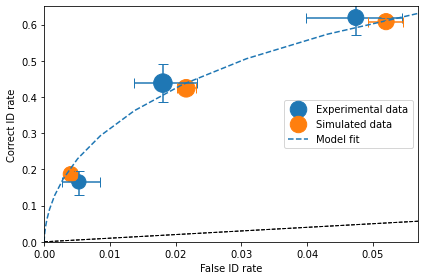

In [58]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)

# Need to process the synthetic data
dp1 = dr1.process()

# calculate uncertainties using bootstrap
dp.calculateConfidenceBootstrap()
dp1.calculateConfidenceBootstrap()

# plot ROCs
dp.plotROC(label="Experimental data")
dp1.plotROC(label="Simulated data")
mf.plotROC(label="Model fit")

import matplotlib.pyplot as _plt
legend()